-------------------------------------------
Affichage données standardisées            
-----------------------------------------------------------
Appel Aglo Clustering 'complete' pour une valeur de k fixée
Coefficient de silhouette :  0.964542178264737
Silhouette analysis - Elapsed time: 1.4631073474884033 seconds
Calinski Harabsz score analysis - Elapsed time: 0.8290627002716064 seconds


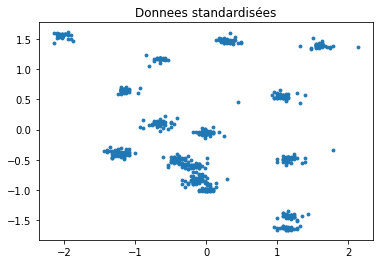

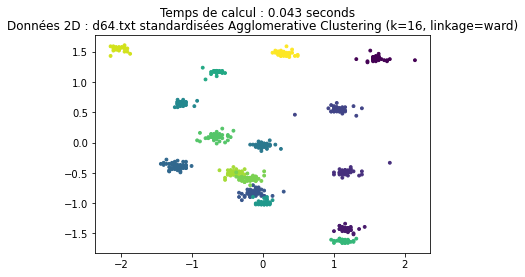

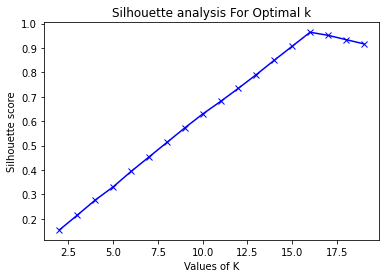

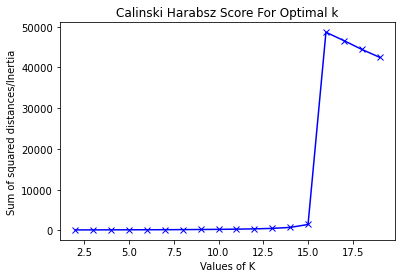

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics
import pandas as pd


##################################################################

path = './new-data/'
filename = "d64.txt"
# databrut = arff.loadarff(open(path+"banana.arff", 'r'))
databrut = pd.read_csv(path+filename, sep=" ", encoding = "ISO-8859-1", skipinitialspace=True)
# datanp = np.array([[x[0],x[1]] for x in databrut[0]])
datanp = databrut.to_numpy()


########################################################################
# Preprocessing: standardization of data
########################################################################

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(datanp)

data_scaled = scaler.transform(datanp)

import scipy.cluster.hierarchy as shc

print("-------------------------------------------")
print("Affichage données standardisées            ")
f0_scaled = data_scaled[:,0] # tous les élements de la première colonne
f1_scaled = data_scaled[:,1] # tous les éléments de la deuxième colonne
#print(f0)
#print(f1)

plt.scatter(f0_scaled, f1_scaled, s=8)
plt.title("Donnees standardisées")

distance = shc.linkage(data_scaled, 'complete')
distance1 = shc.linkage(data_scaled, 'single')
distance2 = shc.linkage(data_scaled, 'average')
distance3 = shc.linkage(data_scaled, 'ward')
distance4 = shc.linkage(data_scaled, 'centroid')


# fig = plt.figure()
# fig.suptitle("Complete")
# shc.dendrogram(distance,
#             orientation='top',
#             distance_sort='descending',
#             show_leaf_counts=True)
# fig = plt.figure()
# fig.suptitle("Single")
# shc.dendrogram(distance1,
#             orientation='top',
#             distance_sort='descending',
#             show_leaf_counts=True)
# fig = plt.figure()
# fig.suptitle("Average")
# shc.dendrogram(distance2,
#             orientation='top',
#             distance_sort='descending',
#             show_leaf_counts=True)
# fig = plt.figure()
# fig.suptitle("Ward")
# shc.dendrogram(distance3,
#             orientation='top',
#             distance_sort='descending',
#             show_leaf_counts=True)
# fig = plt.figure()
# fig.suptitle("Centroid")
# shc.dendrogram(distance4,
#             orientation='top',
#             distance_sort='descending',
#             show_leaf_counts=True)

# Run clustering method for a given number of clusters
print("-----------------------------------------------------------")
print("Appel Aglo Clustering 'complete' pour une valeur de k fixée")
tps3 = time.time()
k=16
linkage='ward'
model_scaled = cluster.AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=linkage)
model_scaled.fit(data_scaled)
#cluster.fit_predict(X)

tps4 = time.time()
labels_scaled = model_scaled.labels_
fig = plt.figure()
plt.scatter(f0_scaled, f1_scaled, c=labels_scaled, s=8)
plt.title("Données 2D : " + filename + " standardisées Agglomerative Clustering (k=" + str(k) + ", linkage="+linkage+")")
plt.suptitle("Temps de calcul : " + str(round(tps4 - tps3, 4)) + " seconds")
#print("labels", labels)

# Some evaluation metrics
silh = metrics.silhouette_score(data_scaled, labels_scaled, metric='euclidean')
print("Coefficient de silhouette : ", silh)


def evaluateACCalinskiHarabsz(data_scaled, maxNbClusters, linkage):
    start = time.time()
    calinski_harabsz = []
    K = range(2,maxNbClusters)
    fig = plt.figure()
    for num_clusters in K :
        model_scaled = cluster.AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage=linkage)
        model_scaled.fit(data_scaled)
        labels_scaled = model_scaled.labels_
        silh = metrics.calinski_harabasz_score(data_scaled, labels_scaled)
        calinski_harabsz.append(silh)
    end = time.time()
    print("Calinski Harabsz score analysis - Elapsed time: " + str(end - start) + " seconds")
    plt.plot(K,calinski_harabsz,"bx-")
    plt.xlabel("Values of K") 
    plt.ylabel("Sum of squared distances/Inertia") 
    plt.title("Calinski Harabsz Score For Optimal k")


def evaluateACSilhouette(data_scaled, maxNbClusters, linkage):
    start = time.time()
    silhouettes = []
    K = range(2,maxNbClusters)
    fig = plt.figure()
    for num_clusters in K :
        model_scaled = cluster.AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage=linkage)
        model_scaled.fit(data_scaled)
        labels_scaled = model_scaled.labels_
        silh = metrics.silhouette_score(data_scaled, labels_scaled, metric='euclidean')
        silhouettes.append(silh)
    end = time.time()
    print("Silhouette analysis - Elapsed time: " + str(end - start) + " seconds")
    plt.plot(K,silhouettes,"bx-")
    plt.xlabel("Values of K") 
    plt.ylabel("Silhouette score") 
    plt.title("Silhouette analysis For Optimal k")

evaluateACSilhouette(data_scaled, 20, linkage)
evaluateACCalinskiHarabsz(data_scaled, 20, linkage)

plt.show()

########################################################################
# TRY : parameters for dendrogram and hierarchical clustering
# EVALUATION : with several metrics (for several number of clusters)
########################################################################